In [18]:
import quandl
import pandas as pd
import quandl as q
import numpy as np
import matplotlib.pyplot as plt
quandl.ApiConfig.api_key = "-qMZRw2S5XascrrTLjF4"

In [19]:
#pega os dados da API
msft_data = q.get("EOD/MSFT", start_date="2010-01-01", end_date="2020-01-01")
msft_data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,31.7500,32.07,31.29,31.880,154507000.0,0.0,1.0,27.484005,27.761009,27.085812,27.596538,154507000.0
2013-09-04,31.3900,31.47,31.11,31.195,142320600.0,0.0,1.0,27.172375,27.241626,26.929997,27.003576,142320600.0
2013-09-05,31.1000,31.44,30.95,31.235,71644900.0,0.0,1.0,26.921340,27.215657,26.791495,27.038201,71644900.0
2013-09-06,31.3100,31.39,31.13,31.152,75434900.0,0.0,1.0,27.103124,27.172375,26.947309,26.966354,75434900.0
2013-09-09,31.2208,31.79,31.20,31.655,49628500.0,0.0,1.0,27.025909,27.518631,27.007904,27.401769,49628500.0


In [20]:
#retorno diário
# chama `Adj Close` para `daily_close`
daily_close = msft_data[['Adj_Close']]

# retorna a fracao
daily_return = daily_close.pct_change()

# replaca de NA por 0
daily_return.fillna(0, inplace=True)

print(daily_return)

            Adj_Close
Date                 
2013-09-03   0.000000
2013-09-04  -0.021487
2013-09-05   0.001282
2013-09-06  -0.002657
2013-09-09   0.016147
...               ...
2017-12-21  -0.000234
2017-12-22   0.000117
2017-12-26  -0.001286
2017-12-27   0.003630
2017-12-28   0.000117

[1090 rows x 1 columns]


In [28]:
#media movel 7 dias
adj_price = msft_data['Adj_Close']
mav = adj_price.rolling(window=15).mean()

Date
2017-12-14    80.982311
2017-12-15    81.213647
2017-12-18    81.375389
2017-12-19    81.436606
2017-12-20    81.577083
2017-12-21    81.662786
2017-12-22    81.743335
2017-12-26    82.021711
2017-12-27    82.287199
2017-12-28    82.476650
Name: Adj_Close, dtype: float64


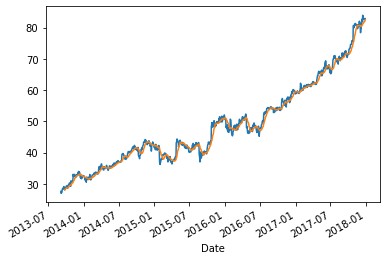

In [139]:
# print mav
print(mav[-10:])
adj_price.plot()
mav.plot()

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [152]:
# Separa para treinamento e validação os dados
array = msft_data.values
X = array[:,[0,1,3,4]]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [166]:
models = []
models.append(('LR', LinearRegression))
# Evaluate dos modelos
results = []
names = []
k_fold = KFold(n_splits=10)
for name, model in models:
	cv_results = cross_val_score(model, X_train, Y_train, cv=k_fold)
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [165]:
Y_train

array([57.6  , 69.62 , 38.13 , 71.15 , 42.09 , 47.18 , 41.98 , 58.87 ,
       73.86 , 46.59 , 68.94 , 31.235, 51.79 , 55.43 , 36.69 , 46.8  ,
       40.32 , 72.26 , 51.65 , 39.36 , 61.09 , 56.21 , 50.03 , 73.05 ,
       41.615, 46.44 , 47.   , 52.48 , 49.83 , 57.67 , 36.885, 37.75 ,
       71.21 , 67.71 , 47.61 , 73.3  , 37.175, 32.39 , 75.31 , 56.53 ,
       46.86 , 69.3  , 33.32 , 47.59 , 47.58 , 37.08 , 73.16 , 70.   ,
       37.2  , 47.13 , 46.76 , 37.16 , 86.38 , 57.6  , 38.41 , 77.49 ,
       47.27 , 44.15 , 52.055, 40.47 , 45.48 , 69.84 , 54.71 , 39.54 ,
       45.34 , 72.79 , 56.81 , 44.87 , 39.83 , 70.1  , 65.68 , 45.26 ,
       54.21 , 47.47 , 57.82 , 58.7  , 68.77 , 37.36 , 76.42 , 67.69 ,
       52.35 , 59.65 , 72.7  , 44.08 , 48.74 , 73.87 , 43.53 , 49.94 ,
       72.68 , 57.56 , 54.92 , 47.59 , 83.93 , 70.27 , 62.3  , 77.12 ,
       61.01 , 77.59 , 60.86 , 68.57 , 46.9  , 59.87 , 55.05 , 56.21 ,
       55.82 , 41.695, 39.69 , 72.5  , 57.62 , 82.53 , 51.22 , 57.53 ,
      

In [132]:
y

array([31.88 , 31.195, 31.235, ..., 85.4  , 85.71 , 85.72 ])